In [4]:
import networkx as nx

In [5]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

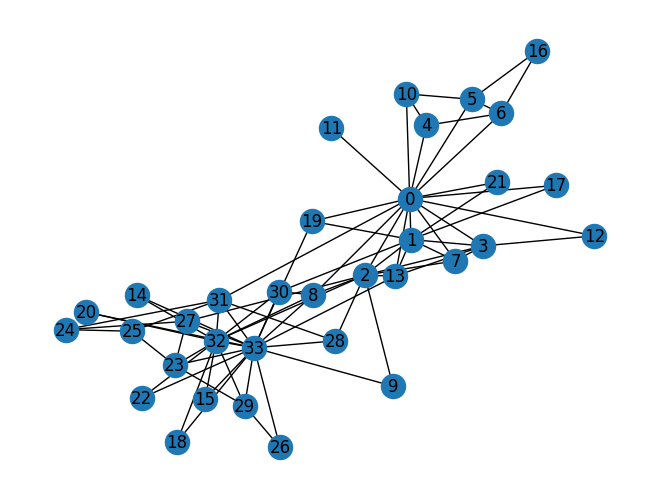

In [6]:
# Visualize the graph
nx.draw(G, with_labels = True)

In [7]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  ############# Your code here ############
  degrees = [val for (node, val) in G.degree()]
  sum_degrees = sum(degrees)
  avg_degree = sum_degrees / num_nodes
  avg_degree = round(avg_degree)
  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


In [8]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)
 
  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function
  cluster_coef = nx.average_clustering(G)
  avg_cluster_coef = round(cluster_coef, 2)
  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


In [9]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.
  # Please round r1 to 2 decimal places.
 
  ############# Your code here ############
  ## Note: 
  ## 1: You should not use nx.pagerank
  r1 = (1 - beta) / G.number_of_nodes()
  for j in G.neighbors(node_id):
    d_j = G.degree(j)
    r1 += beta * (r0 / d_j)
  r1 = round(r1, 2)
  #########################################

  return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.13


In [10]:
def closeness_centrality(G, node):
  # TODO: Implement the function that calculates closeness centrality 
  # for a node in karate club network. G is the input karate club 
  # network and node is the node id in the graph. Please round the 
  # closeness centrality result to 2 decimal places.

  closeness = 0
  
  closeness_normalized=nx.closeness_centrality(G,node)
  closeness_unnormalized=closeness_normalized/(G.number_of_nodes()-1)
  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized 
  ## closeness directly, which is different from the raw (unnormalized) 
  ## one that we learned in the lecture.

  #########################################
  k=(closeness_normalized,closeness_unnormalized)
  return k

node = 5
closeness = closeness_centrality(G, node=node)
print(f"The node 5 has closeness centrality normalized {round(closeness[0],2)} and The node 5 has closeness centrality unnormalized {round(closeness[1],2)}")


The node 5 has closeness centrality normalized 0.38 and The node 5 has closeness centrality unnormalized 0.01


# 2 Graph to Tensor

In [11]:
import torch
print(torch.__version__)

2.0.0+cu118


In [12]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.2938, 0.9153, 0.2484, 0.9428],
        [0.2920, 0.5680, 0.9997, 0.3814],
        [0.1146, 0.2224, 0.1948, 0.3472]])
torch.Size([3, 4])


In [13]:
from networkx.drawing.nx_pylab import random_layout
ones=torch.ones(3,5)
print(ones)
zeros=torch.zeros(2,3)
print(zeros)
random_tensor=torch.rand(4,6)
print(random_tensor)
print(random_tensor.shape)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.3994, 0.7720, 0.6614, 0.2093, 0.8462, 0.5444],
        [0.7007, 0.7302, 0.9286, 0.7079, 0.8693, 0.2430],
        [0.9360, 0.6616, 0.1665, 0.6142, 0.2594, 0.9819],
        [0.5223, 0.6387, 0.2519, 0.1167, 0.1348, 0.2808]])
torch.Size([4, 6])


In [14]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


In [15]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.
  
  ############# Your code here ############
  edge_list = list(G.edges())
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############
  node_index = {node: index for index, node in enumerate(set([edge[0] for edge in edge_list] + [edge[1] for edge in edge_list]))}
  edge_index = [(node_index[edge[0]], node_index[edge[1]]) for edge in edge_list]
  edge_index = torch.tensor(edge_index).t()
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [16]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. In this implementation, self loops should 
  # not be considered as either a positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph, if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one?

  neg_edge_list = []

  ############# Your code here ############
  possible_edges = set([(i, j) for i in range(len(G.nodes())) for j in range(i+1, len(G.nodes()))])
  actual_edges = set(G.edges())
  non_edges = possible_edges - actual_edges
  neg_edge_list = random.sample(non_edges, num_neg_samples)
  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
print("Edge 1 can be a negative edge: {}".format(edge_1 not in G.edges()))
print("Edge 2 can be a negative edge: {}".format(edge_2 not in G.edges()))
print("Edge 3 can be a negative edge: {}".format(edge_3 not in G.edges()))
print("Edge 4 can be a negative edge: {}".format(edge_4 not in G.edges()))
print("Edge 5 can be a negative edge: {}".format(edge_5 not in G.edges()))
#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])
Edge 1 can be a negative edge: False
Edge 2 can be a negative edge: True
Edge 3 can be a negative edge: False
Edge 4 can be a negative edge: False
Edge 5 can be a negative edge: True


<ipython-input-16-3494989d46c5>:19: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neg_edge_list = random.sample(non_edges, num_neg_samples)


# 3 Node Emebedding Learning


In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [18]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


In [24]:
emb_s=nn.Embedding(num_embeddings=6,embedding_dim=5)
print(f'sample embedding layer {emb_s}')

sample embedding layer Embedding(6, 5)


In [20]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[-0.6457, -1.3576, -0.0460, -1.3292,  0.1384,  1.5956, -0.3948, -2.6813]],
       grad_fn=<EmbeddingBackward0>)
tensor([[-0.6457, -1.3576, -0.0460, -1.3292,  0.1384,  1.5956, -0.3948, -2.6813],
        [ 0.4939,  0.3080, -1.5917,  1.5756,  1.4130,  1.0630, -0.0606, -1.8422]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


In [21]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of returned 
  # layer should be initialized under uniform distribution. 


  ############# Your code here ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  emb.weight.data.uniform_(-1, 1)
  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[-0.5773,  0.4670, -0.7134,  0.9294, -0.4133,  0.5903,  0.0341, -0.4398,
          0.6678, -0.7630, -0.5291,  0.1199,  0.7933, -0.4285, -0.6089, -0.6384],
        [ 0.4972,  0.3093, -0.2314,  0.9640,  0.2024, -0.2580, -0.0142,  0.9830,
          0.6717, -0.0741,  0.9804,  0.4391, -0.5324, -0.9101,  0.5811,  0.9378]],
       grad_fn=<EmbeddingBackward0>)


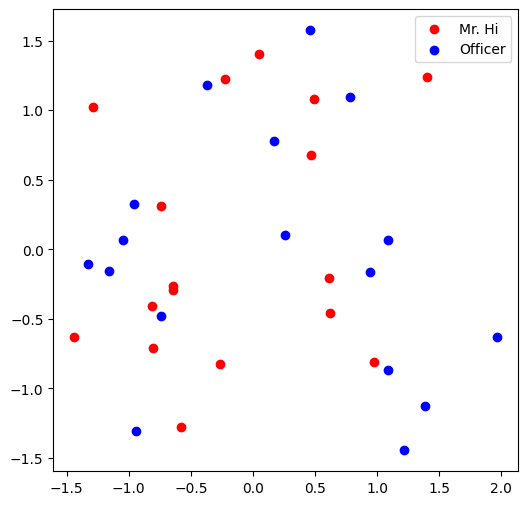

In [22]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

In [25]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############
  accu = (torch.round(pred) == label).sum() / label.size(0)
  accu = round(accu.item(), 4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and 
  # learning rate. In general, you need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (6) Update the embeddings using the loss and optimizer 
  # (as a sanity check, the loss should decrease during training)

  epochs = 1500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############
    optimizer.zero_grad()
    u, v = train_edge[0], train_edge[1]
    pred = sigmoid(torch.bmm(emb(u).unsqueeze(1), emb(v).unsqueeze(2)).squeeze())
    loss = loss_fn(pred, train_label)

    loss.backward()
    optimizer.step()

    print(
      f"[Epoch {i:4d}]\t"
      f"acc: {accuracy(pred, train_label): .4f}\t"
      f"loss: {loss.item(): .6f}"
    )
    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

train(emb, loss_fn, sigmoid, train_label, train_edge)

torch.Size([2, 78])
torch.Size([2, 156])
[Epoch    0]	acc:  0.5192	loss:  0.887739
[Epoch    1]	acc:  0.5192	loss:  0.885270
[Epoch    2]	acc:  0.5192	loss:  0.880600
[Epoch    3]	acc:  0.5192	loss:  0.873990
[Epoch    4]	acc:  0.5256	loss:  0.865684
[Epoch    5]	acc:  0.5385	loss:  0.855917
[Epoch    6]	acc:  0.5449	loss:  0.844904
[Epoch    7]	acc:  0.5513	loss:  0.832846
[Epoch    8]	acc:  0.5641	loss:  0.819928
[Epoch    9]	acc:  0.5769	loss:  0.806316
[Epoch   10]	acc:  0.5833	loss:  0.792162
[Epoch   11]	acc:  0.5962	loss:  0.777601
[Epoch   12]	acc:  0.5962	loss:  0.762752
[Epoch   13]	acc:  0.5962	loss:  0.747722
[Epoch   14]	acc:  0.5962	loss:  0.732604
[Epoch   15]	acc:  0.6090	loss:  0.717478
[Epoch   16]	acc:  0.6154	loss:  0.702413
[Epoch   17]	acc:  0.6282	loss:  0.687467
[Epoch   18]	acc:  0.6346	loss:  0.672690
[Epoch   19]	acc:  0.6538	loss:  0.658122
[Epoch   20]	acc:  0.6538	loss:  0.643798
[Epoch   21]	acc:  0.6538	loss:  0.629743
[Epoch   22]	acc:  0.6795	loss:  0.

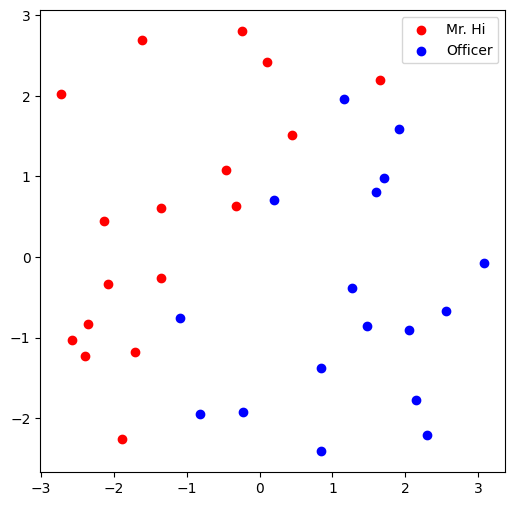

In [26]:
# Visualize the final learned embedding
visualize_emb(emb)